In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [71]:
src = "/home/amir/Документы/MIPT_laba/physPend/physPend.xlsx"

In [72]:
time_from_a = pd.read_excel(src, sheet_name="T(a)")[:12]

In [73]:
time_from_a

,номер опыта,"a, см","x_цм, см","Tсум, с",N,"T1, с",Unnamed: 6,Unnamed: 7,"g, м/с",l_пр,m_пр,m_ст
0,1.0,16.0,14.6,83.25,50.0,1.6650,NaN,Угол 10 deg,9.765670,0.685755,0.0766,0.8702
1,2.0,19.0,17.3,160.00,100.0,1.6000,NaN,NaN,9.785028,0.634513,NaN,NaN
2,3.0,22.0,20.0,156.00,100.0,1.5600,NaN,NaN,9.820624,0.605378,NaN,NaN
3,4.0,25.0,22.7,153.66,100.0,1.5366,NaN,Угол 5 deg,9.872608,0.590462,NaN,NaN
4,5.0,28.0,25.5,152.84,100.0,1.5284,NaN,NaN,9.851626,0.582935,NaN,NaN
5,6.0,31.0,28.3,152.94,100.0,1.5294,NaN,NaN,9.835515,0.582744,NaN,NaN
6,7.0,34.0,31.0,153.72,100.0,1.5372,NaN,NaN,9.853890,0.589803,NaN,NaN
7,8.0,39.0,35.6,156.07,100.0,1.5607,NaN,NaN,9.851485,0.607825,NaN,NaN
8,9.0,42.0,38.3,157.91,100.0,1.5791,NaN,NaN,9.868071,0.623289,NaN,NaN
9,10.0,45.0,41.0,160.07,100.0,1.6007,NaN,NaN,9.872604,0.640752,NaN,NaN


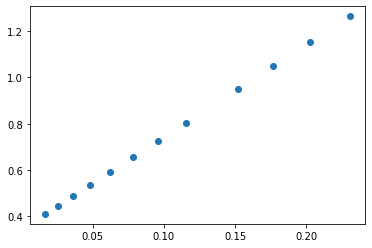

In [101]:
df = time_from_a
T = df["T1, с"]
a = df["a, см"]/100
xc = df["x_цм, см"]/100
plt.plot(a**2, T ** 2 * a, 'o')

In [75]:
def line(x, k, b):
    return k*x+b

popt, pcov = curve_fit(line, a**2, T**2*xc)
print(popt)
print(np.sqrt(np.diag(pcov)))

[ 0.03673763 30.80323483]
[8.08666998e-05 1.00564469e-01]


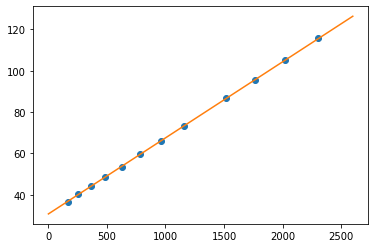

In [76]:
plt.plot(a**2, T ** 2 * xc, 'o')
plt.plot(np.linspace(0, 2600), line(np.linspace(0, 2600), *popt))

In [77]:
4*np.pi**2/popt[0]/1.08802574120892

987.6643674652214

In [78]:
0.03673763/8.08666998e-05*4*np.pi**2/popt[0]

488191.2286735734

In [79]:
8.08666998e-05/0.03673763*4*np.pi**2/popt[0]/1.08802574120892


2.1740421988834604

3.673763378989862 0.008086669967282134
0.30803234833563986 0.0010056446857227834


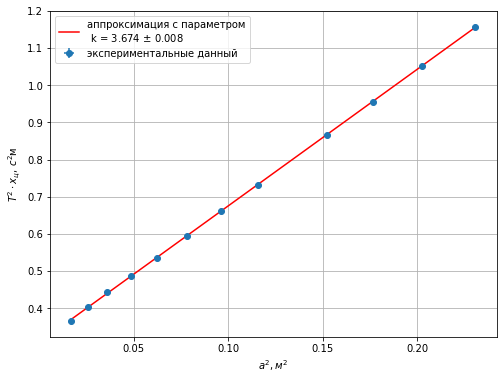

In [113]:
x = a**2
y = T ** 2 * xc
xerr = 2*a*0.1/100
yerr = np.abs(y*(2*0.1/100/T + 0.1/100/xc))

#simple approximation
i = 100
def f(x, k, b):
    return b + k * x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
error = np.sqrt(np.diag(pcov))
for v, er in zip(popt, error):
    print(v, er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", xerr=xerr, yerr=yerr, label="экспериментальные данный")
X = np.linspace(x.min(), x.max(), num=50)
pres = '0.3f'   # точность при форматировании
plt.plot(X, f(X, *popt), 'r', label=
f"аппроксимация с параметром\n k = {format(popt[0], pres)} $\pm$ {format(error[0], pres)}")

plt.grid(True)
plt.xlabel(r"$a^2, м^2$")
plt.ylabel(r"$T^2\cdot x_{ц}$, $с^2$м")
# plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"graph.png", dpi=200)
i+=1

In [99]:
print(*xerr, sep=',')
print(*yerr, sep=',')
i

3.2,3.8000000000000003,4.4,5.0,5.6000000000000005,6.2,6.800000000000001,7.800000000000001,8.4,9.0,9.600000000000001,2.6
0.32584050000000003,0.3113600000000001,0.30576000000000003,0.30587559599999997,0.311549056,0.32047047600000006,0.331604784,0.35470028900000006,0.370314741,0.38748144900000003,0.4058298240000001,0.3569614409999999


101